# Study the effect of different optimizers

## Summary

This notebook is created to see the effect of different optimizers: SGD, RMSprop, Adam. Firstly, I used different optimizer without using any dropout and noticed overfitting. Then I used dropout between the model with Adam optimizer to solve the problem of overfiiting and my accuracy is in increased to **97.96%** on MNIST Test Dataset by using Multilayer Preceptron model.

In [1]:
import keras

Using TensorFlow backend.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, RMSprop, Adam
from keras.utils import np_utils
np.random.seed(1671)

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

#### Using SGD optimizer

In [26]:
model = Sequential()
model.add(Dense(128, input_shape=(784,)))
model.add(Activation('relu'))
#model.add(Dropout(0.3))
model.add(Dense(128))
model.add(Activation('relu'))
#model.add(Dropout(0.3))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_16 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_17 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1290      
_________________________________________________________________
activation_18 (Activation)   (None, 10)                0         
Total params: 118,282.0
Trainable params: 118,282.0
Non-trainable params: 0.0
________________________________________________________________

In [27]:
OPTIMIZER = SGD() #optimizer

model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

In [28]:
history = model.fit(X_train, Y_train,batch_size=64, epochs=20,verbose=1, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 4s - loss: 1.0136 - acc: 0.7577 - val_loss: 0.4543 - val_acc: 0.8849
Epoch 2/20
48000/48000 [==============================] - 3s - loss: 0.4108 - acc: 0.8880 - val_loss: 0.3412 - val_acc: 0.9062
Epoch 3/20
48000/48000 [==============================] - 3s - loss: 0.3373 - acc: 0.9055 - val_loss: 0.3008 - val_acc: 0.9152
Epoch 4/20
48000/48000 [==============================] - 3s - loss: 0.3005 - acc: 0.9162 - val_loss: 0.2712 - val_acc: 0.9240
Epoch 5/20
48000/48000 [==============================] - 3s - loss: 0.2742 - acc: 0.9227 - val_loss: 0.2521 - val_acc: 0.9300
Epoch 6/20
48000/48000 [==============================] - 3s - loss: 0.2541 - acc: 0.9283 - val_loss: 0.2375 - val_acc: 0.9334
Epoch 7/20
48000/48000 [==============================] - 3s - loss: 0.2372 - acc: 0.9332 - val_loss: 0.2245 - val_acc: 0.9356
Epoch 8/20
48000/48000 [==============================] - 4s 

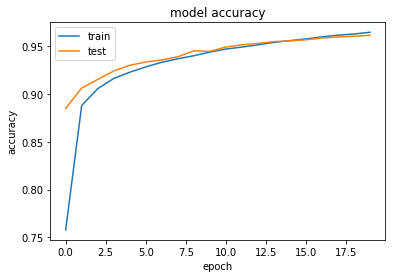

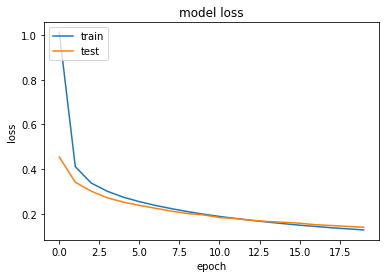

In [29]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
# evaluate the network
loss, accuracy = model.evaluate(X_test, Y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

 9024/10000 [==========================>...] - ETA: 0s
Loss: 0.14, Accuracy: 96.04%


#### Using RMSprop optimizer

In [31]:
model2 = Sequential()
model2.add(Dense(128, input_shape=(784,)))
model2.add(Activation('relu'))
#model.add(Dropout(0.3))
model2.add(Dense(128))
model2.add(Activation('relu'))
#model.add(Dropout(0.3))
model2.add(Dense(10))
model2.add(Activation('softmax'))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_19 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_20 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1290      
_________________________________________________________________
activation_21 (Activation)   (None, 10)                0         
Total params: 118,282.0
Trainable params: 118,282.0
Non-trainable params: 0.0
________________________________________________________________

In [32]:
OPTIMIZER = RMSprop() #optimizer

model2.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

In [33]:
history2 = model2.fit(X_train, Y_train,batch_size=64, epochs=20,verbose=1, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 4s - loss: 0.2788 - acc: 0.9180 - val_loss: 0.1444 - val_acc: 0.9574
Epoch 2/20
48000/48000 [==============================] - 3s - loss: 0.1201 - acc: 0.9636 - val_loss: 0.1122 - val_acc: 0.9669
Epoch 3/20
48000/48000 [==============================] - 3s - loss: 0.0848 - acc: 0.9748 - val_loss: 0.1148 - val_acc: 0.9649
Epoch 4/20
48000/48000 [==============================] - 3s - loss: 0.0651 - acc: 0.9805 - val_loss: 0.0844 - val_acc: 0.9751
Epoch 5/20
48000/48000 [==============================] - 3s - loss: 0.0509 - acc: 0.9842 - val_loss: 0.1007 - val_acc: 0.9721
Epoch 6/20
48000/48000 [==============================] - 3s - loss: 0.0419 - acc: 0.9871 - val_loss: 0.0936 - val_acc: 0.9758
Epoch 7/20
48000/48000 [==============================] - 3s - loss: 0.0336 - acc: 0.9899 - val_loss: 0.1063 - val_acc: 0.9746
Epoch 8/20
48000/48000 [==============================] - 3s 

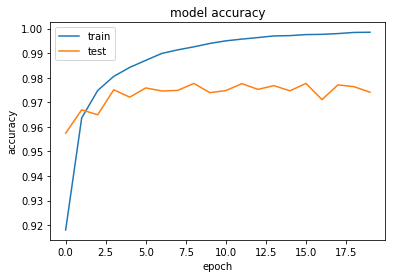

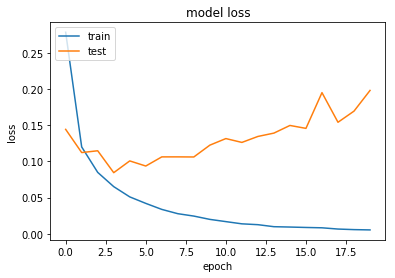

In [34]:
# summarize history for accuracy
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
# evaluate the network
loss, accuracy = model2.evaluate(X_test, Y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

10000/10000 [==============================] - 0s     

Loss: 0.17, Accuracy: 97.75%


#### Using Adam optimizer

In [36]:
model3 = Sequential()
model3.add(Dense(128, input_shape=(784,)))
model3.add(Activation('relu'))
#model.add(Dropout(0.3))
model3.add(Dense(128))
model3.add(Activation('relu'))
#model.add(Dropout(0.3))
model3.add(Dense(10))
model3.add(Activation('softmax'))
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_22 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_23 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                1290      
_________________________________________________________________
activation_24 (Activation)   (None, 10)                0         
Total params: 118,282.0
Trainable params: 118,282.0
Non-trainable params: 0.0
________________________________________________________________

In [39]:
OPTIMIZER = Adam() #optimizer

model3.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

In [40]:
history3 = model3.fit(X_train, Y_train,batch_size=64, epochs=20,verbose=1, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 4s - loss: 0.2983 - acc: 0.9143 - val_loss: 0.1460 - val_acc: 0.9583
Epoch 2/20
48000/48000 [==============================] - 4s - loss: 0.1158 - acc: 0.9658 - val_loss: 0.1043 - val_acc: 0.96940.96
Epoch 3/20
48000/48000 [==============================] - 4s - loss: 0.0774 - acc: 0.9763 - val_loss: 0.1036 - val_acc: 0.9677
Epoch 4/20
48000/48000 [==============================] - 4s - loss: 0.0588 - acc: 0.9819 - val_loss: 0.1091 - val_acc: 0.9677
Epoch 5/20
48000/48000 [==============================] - 4s - loss: 0.0446 - acc: 0.9854 - val_loss: 0.1037 - val_acc: 0.9709
Epoch 6/20
48000/48000 [==============================] - 4s - loss: 0.0339 - acc: 0.9897 - val_loss: 0.0884 - val_acc: 0.9753
Epoch 7/20
48000/48000 [==============================] - 4s - loss: 0.0280 - acc: 0.9908 - val_loss: 0.1031 - val_acc: 0.9737
Epoch 8/20
48000/48000 [==============================] -

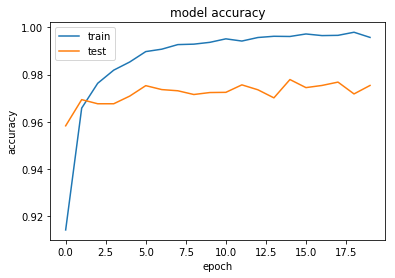

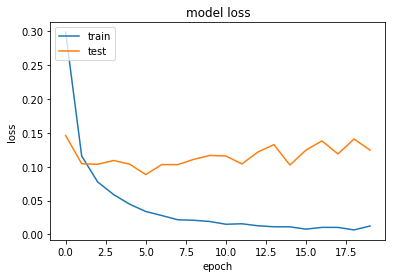

In [41]:
# summarize history for accuracy
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [42]:
# evaluate the network
loss, accuracy = model3.evaluate(X_test, Y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

 9024/10000 [==========================>...] - ETA: 0s
Loss: 0.11, Accuracy: 97.75%


#### Using Adam optimizer and also used Dropout between the model

In [43]:
model4 = Sequential()
model4.add(Dense(128, input_shape=(784,)))
model4.add(Activation('relu'))
model4.add(Dropout(0.3))
model4.add(Dense(128))
model4.add(Activation('relu'))
model4.add(Dropout(0.3))
model4.add(Dense(10))
model4.add(Activation('softmax'))
model4.summary()

OPTIMIZER = Adam() #optimizer

model4.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])
history4 = model4.fit(X_train, Y_train,batch_size=64, epochs=20,verbose=1, validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_25 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_26 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)                1290      
__________

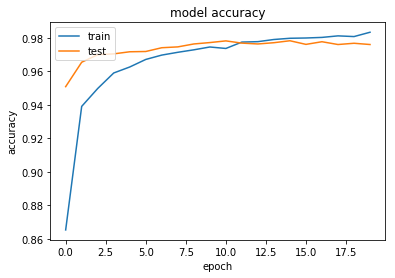

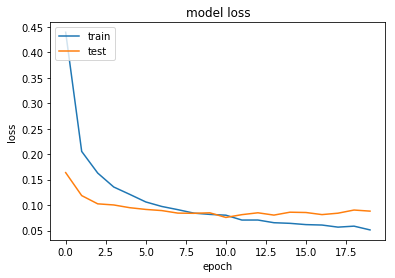

In [45]:
# summarize history for accuracy
plt.plot(history4.history['acc'])
plt.plot(history4.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [46]:
# evaluate the network
loss, accuracy = model4.evaluate(X_test, Y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

 9280/10000 [==========================>...] - ETA: 0s
Loss: 0.08, Accuracy: 97.96%
